
# Исследование рынка общественного питания Москвы

# Описание проекта

**Цель исследования:** Необходимо подготовить исследование рынка общественного питания Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут инвесторам в выборе подходящего места для размещения кофейни.

Для анализа доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. 

**Описание данных**

name — название заведения;

address — адрес заведения;

category — категория заведения, например «кафе», «пиццерия» или «кофейня»;

hours — информация о днях и часах работы;

lat — широта географической точки, в которой находится заведение;

lng — долгота географической точки, в которой находится заведение;

rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);

price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;

avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:

«Средний счёт: 1000–1500 ₽»;

«Цена чашки капучино: 130–220 ₽»;

«Цена бокала пива: 400–600 ₽».

middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:

Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.

Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.

middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:

Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.

Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):

0 — заведение не является сетевым

1 — заведение является сетевым

district — административный район, в котором находится заведение, например Центральный административный округ;

seats — количество посадочных мест.




**Описание проекта:** было проведено исследование рынка общественного питания Москвы. По результатам анализа подготовлена презентация для инвесторов с рекомендациями. В построении графиков я использованы
библиотеки seaborn и plotly. 

# Обзор данных

In [1]:
#Импортируем библиотеки. 
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import re
import folium
from folium import Map, Choropleth, Marker
# импортируем кластер
from folium.plugins import MarkerCluster

In [2]:
#Считаем данные из csv-файла в датафрейм и сохраняем в переменную data.
try:
    data = pd.read_csv('/datasets/moscow_places.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')

In [3]:
# подключаем модуль для работы с JSON-форматом
import json
try:
    with open('C:\\Users\\Наталья\\Desktop\\admin_level_geomap.geojson', 'r') as f:
        geo_json = json.load(f)
        json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True)
        
except:
    with open('/datasets/admin_level_geomap.geojson', 'r') as f:
        geo_json = json.load(f)
        json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True)


In [4]:
#функция для показа значений барплот
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [5]:
#Выведим первые 5 строчек датафрейма data на экран.
data.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [7]:
#сохраним данные о размере датафрейма
shape_data = data.shape[0]

Для анализа представлен датасет из 8406 строк и 14 столбцов. Всего содержится информация о 8405 заведений общественного питания.

# Предобработка данных

## Обработка дубликатов строк

Проверим данные на неявные дубликаты. Выгрузим все уникальные названия мест общепита, относящихся к сетям

In [8]:
set = data.query('chain == 1')
set['name'].sort_values().unique()

array(['1-я Креветочная', '10 Идеальных Пицц', '18 Грамм', '4 Сезона',
       '7 Сэндвичей', '8 Вафель', '9 Bar Coffee', 'ABC Coffee Roasters',
       'Air Coffee', 'Americano Black Coffee & Food', 'Arabix',
       'Arcus Bar And Food', 'Asia Gourmet', 'BB&Burgers', 'BFL’S',
       'Bakery', 'Bfl’s', 'BigСуши', 'Black Star Burger', 'Bodrero',
       'Bon Lavash', 'Boston seafood & bar', 'Bowl Family',
       'Brasserie Lambic', 'Bro&n', 'Brooms', 'Burger Club',
       'Burger Heroes', 'Bổ', 'CHICKO', 'Cafe', 'Cafe inn',
       'Café de Paris', 'Camera Obscura', 'Camorra Pizza e Birra',
       'Campus', 'Cassette Cafe', 'Chicha San Chen', 'Cinnabon',
       'City life', 'CofeFest', 'Coffee Bean', 'Coffee Break',
       'Coffee Guru', 'Coffee Like', 'Coffee Moose', 'Coffee Music',
       'Coffee Party', 'Coffee Point', 'Coffee Way',
       'Coffee and the City', 'Coffee in', "CoffeeBar'17", 'CoffeeShots',
       'Coffeebrain', "Coffeekaldi's", 'Coffeeshop Company',
       'Coffeesphere',

In [9]:
#Поставим пробел в названии PhoBo
data['name'] = data['name'].replace('PhoBo', 'Pho bo')

In [10]:
#напишем цикл, который заменит все символы перечисленные в переменной symbols на пробел
symbols = [',', '№', '-', '   ', '  ', '.']
for s in symbols:
    data['name'] = data['name'].str.replace(s, ' ')

In [11]:
#Приведем все названия к одному регистру - первая буква названия заглавная - далее прописные.
data['name'] = data['name'].str.capitalize()

In [12]:
#Еще раз посмотрим нет ли дубликатов в названиях сетевых мест
set = data.query('chain == 1')
set['name'].sort_values().unique()

array(['1 я креветочная', '10 идеальных пицц', '18 грамм', '4 сезона',
       '7 сэндвичей', '8 вафель', '9 bar coffee', 'Abc coffee roasters',
       'Air coffee', 'Americano black coffee & food', 'Arabix',
       'Arcus bar and food', 'Asia gourmet', 'Bakery', 'Bb&burgers',
       'Bfl’s', 'Bigсуши', 'Black star burger', 'Bodrero', 'Bon lavash',
       'Boston seafood & bar', 'Bowl family', 'Brasserie lambic', 'Bro&n',
       'Brooms', 'Burger club', 'Burger heroes', 'Bổ', 'Cafe', 'Cafe inn',
       'Café de paris', 'Camera obscura', 'Camorra pizza e birra',
       'Campus', 'Cassette cafe', 'Chicha san chen', 'Chicko', 'Cinnabon',
       'City life', 'Cofefest', 'Coffee and the city', 'Coffee bean',
       'Coffee break', 'Coffee guru', 'Coffee in', 'Coffee like',
       'Coffee moose', 'Coffee music', 'Coffee party', 'Coffee point',
       'Coffee way', "Coffeebar'17", 'Coffeebrain', "Coffeekaldi's",
       'Coffeeshop company', 'Coffeeshots', 'Coffeesphere', 'Coffprice',
       'C

In [13]:
#Проверим есть ли дубли в сзвязке названия места и его адреса
print('Найдено дубликатов по названию заведения и адресу - ', data.duplicated(subset=['name', 'address']).sum())

Найдено дубликатов по названию заведения и адресу -  3


In [14]:
#Посмотрим на названия заведений дубликатов
data.loc[data.duplicated(subset=['name', 'address'])]

name  category  \
1511                  More poke  ресторан   
2420  Раковарня клешни и хвосты   бар,паб   
3109            Хлеб да выпечка      кафе   

                                      address  \
1511  Москва, Волоколамское шоссе, 11, стр. 2   
2420               Москва, проспект Мира, 118   
3109              Москва, Ярцевская улица, 19   

                                     district  \
1511          Северный административный округ   
2420  Северо-Восточный административный округ   
3109          Западный административный округ   

                                                  hours        lat        lng  \
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...  55.806307  37.497566   
2420  пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...  55.810677  37.638379   
3109                                                NaN  55.738449  37.410937   

      rating price avg_bill  middle_avg_bill  middle_coffee_cup  chain  seats  
1511     4.2   NaN      NaN              NaN                NaN      1  188.0  
2420     4.4   NaN      NaN              NaN                NaN      1  150.0  
3109     4.1   NaN      NaN              NaN                NaN      0  276.0

In [15]:
#сделаем срез по этим названиям
data.query('name == ["More poke", "Раковарня клешни и хвосты", "Хлеб да выпечка"]').sort_values(by='name')

name  category  \
1430                  More poke  ресторан   
1511                  More poke  ресторан   
6088                  More poke  ресторан   
2211  Раковарня клешни и хвосты  ресторан   
2420  Раковарня клешни и хвосты   бар,паб   
7270  Раковарня клешни и хвосты   бар,паб   
3091            Хлеб да выпечка  булочная   
3109            Хлеб да выпечка      кафе   
7937            Хлеб да выпечка   кофейня   

                                      address  \
1430  Москва, Волоколамское шоссе, 11, стр. 2   
1511  Москва, Волоколамское шоссе, 11, стр. 2   
6088           Москва, Духовской переулок, 19   
2211               Москва, проспект Мира, 118   
2420               Москва, проспект Мира, 118   
7270          Москва, Братиславская улица, 12   
3091              Москва, Ярцевская улица, 19   
3109              Москва, Ярцевская улица, 19   
7937             Москва, Каширское шоссе, 61Г   

                                     district  \
1430          Северный административный округ   
1511          Северный административный округ   
6088             Южный административный округ   
2211  Северо-Восточный административный округ   
2420  Северо-Восточный административный округ   
7270     Юго-Восточный административный округ   
3091          Западный административный округ   
3109          Западный административный округ   
7937             Южный административный округ   

                                                  hours        lat        lng  \
1430                             ежедневно, 09:00–21:00  55.806307  37.497566   
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...  55.806307  37.497566   
6088                             ежедневно, 10:00–22:00  55.704177  37.612889   
2211                             ежедневно, 12:00–00:00  55.810553  37.638161   
2420  пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...  55.810677  37.638379   
7270  пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...  55.659744  37.752984   
3091                             ежедневно, 09:00–22:00  55.738886  37.411648   
3109                                                NaN  55.738449  37.410937   
7937                             ежедневно, 09:00–22:00  55.621379  37.714108   

      rating    price                    avg_bill  middle_avg_bill  \
1430     4.2      NaN                         NaN              NaN   
1511     4.2      NaN                         NaN              NaN   
6088     4.4      NaN                         NaN              NaN   
2211     4.4      NaN                         NaN              NaN   
2420     4.4      NaN                         NaN              NaN   
7270     4.9  средние  Цена бокала пива:150–250 ₽              NaN   
3091     4.1      NaN                         NaN              NaN   
3109     4.1      NaN                         NaN              NaN   
7937     4.5      NaN                         NaN              NaN   

      middle_coffee_cup  chain  seats  
1430                NaN      0  188.0  
1511                NaN      1  188.0  
6088                NaN      1    NaN  
2211                NaN      0  150.0  
2420                NaN      1  150.0  
7270                NaN      1   40.0  
3091                NaN      1  276.0  
3109                NaN      0  276.0  
7937                NaN      1    NaN

В целом информация, указанная по дублям данных заведений, не имеет существенных отличий. Рейтинг завединий совпадает. Удалим дубликаты по названиям мест общепита и адресам.

In [16]:
data = data.drop(index=[3109, 2211, 1430])

In [17]:
print('Найдено дубликатов по названию заведения и адресу - ', data.duplicated(subset=['name', 'address']).sum())

Найдено дубликатов по названию заведения и адресу -  0


In [18]:
#проверяем наличие полных дубликатов строк
print('Найдено полных дубликатов строк - ', data.duplicated().sum())

Найдено полных дубликатов строк -  0


In [19]:
#выгрузим все уникальные категории мест общепита
data['category'].sort_values().unique()

array(['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня',
       'пиццерия', 'ресторан', 'столовая'], dtype=object)

In [20]:
#выгрузим все уникальные значения районов Москвы, представленых в датасете
data['district'].sort_values().unique()

array(['Восточный административный округ',
       'Западный административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Центральный административный округ',
       'Юго-Восточный административный округ',
       'Юго-Западный административный округ',
       'Южный административный округ'], dtype=object)

Столбцы 'category' и 'district' не содержат неявных дубликатов.

## Обработка пропусков в данных

In [21]:
#посмотрим сколько пропусков содержится в данных
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 535
lat                     0
lng                     0
rating                  0
price                5088
avg_bill             4587
middle_avg_bill      5254
middle_coffee_cup    7868
chain                   0
seats                3611
dtype: int64

Данные содержат пропуски в столбцах о часах работы заведения, ценах и среднем счете, в количестве мест.
Заполнение пропусков средним или медианным значением производить не будем, поскольку это может исказить результаты исследования. Пропуски оставим без изменеий.

## Столбец с названиями улиц мест общепита

Выделим столбец с названиями улиц мест общепита

In [22]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд', 'аллея','бульвар','набережная','тупик','линия', 'километр', 'парк', 'МКАД', 'заказник']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

data['street'] = data['address'].str.extract(str_pat, flags=re.I)

```python
data['address'].str.split(', ').str[1]
```

In [23]:
data.head(5)

name  category                              address  \
0                Wowфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse coffee shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats                   street  
0                NaN      0    NaN            улица Дыбенко  
1                NaN      0    4.0            улица Дыбенко  
2                NaN      0   45.0       Клязьминская улица  
3              170.0      0    NaN  улица Маршала Федоренко  
4                NaN      1  148.0      Правобережная улица

In [24]:
print('Пропусков в столбце "street": ', data['street'].isna().sum())

Пропусков в столбце "street":  161


## Столбец с круглосуточным режимом заведения

In [25]:
#выделим столбец, в котором укажем работает ли заведение круглосуточноБ использую булевый тип данных.
data['is_24/7'] = data['hours'].str.contains(r'\bкруглосуточно')

In [26]:
data.head(5)

name  category                              address  \
0                Wowфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse coffee shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats                   street is_24/7  
0                NaN      0    NaN            улица Дыбенко   False  
1                NaN      0    4.0            улица Дыбенко   False  
2                NaN      0   45.0       Клязьминская улица   False  
3              170.0      0    NaN  улица Маршала Федоренко   False  
4                NaN      1  148.0      Правобережная улица   False

## Вывод по разделу 3

1. Таким образом, нами были выявлены неявные дубликаты в данных в названиях мест общественного питания.

2. А так же выявлены дубликаты в данных по названию и адресу заведения.

3. Анализируемый датасет содержит пропуски в данных, которые мы оставили без изменений, покольку замена средним или медианным значением может исказить результаты исследования.


# Анализ данных

 ## Обзор категорий заведений

Выясним какие категории заведений представлены в данных.

In [27]:
data['category'].sort_values().unique()

array(['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня',
       'пиццерия', 'ресторан', 'столовая'], dtype=object)

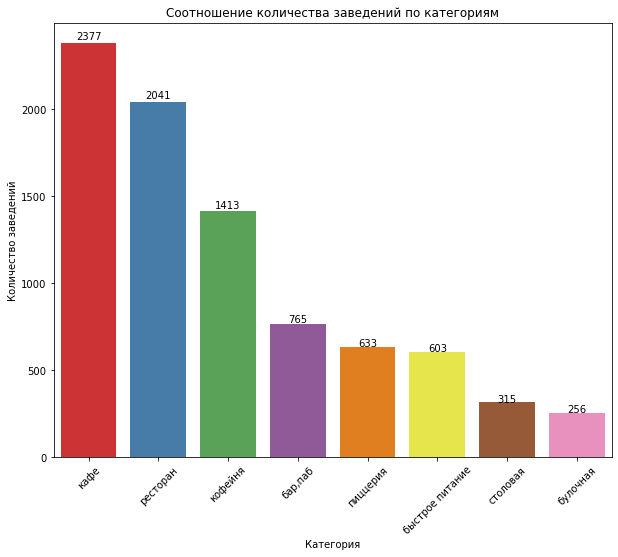

In [28]:
#визуальное представление заведений по категориям
plt.figure(figsize=(10, 8))
p = sns.barplot(x='index',y='category', data=data['category'].value_counts().reset_index(), palette='Set1')
show_values(p)
plt.title('Соотношение количества заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.show()

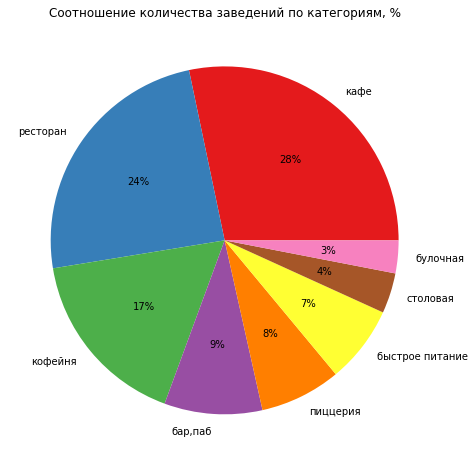

In [29]:

plt.figure(figsize=(10, 8))
colors = sns.color_palette('Set1')
plt.pie(x='category', data = data['category'].value_counts().reset_index(), labels = 'index', colors = colors, autopct='%.0f%%')
plt.title('Соотношение количества заведений по категориям, %')
plt.show()

Всего представлено 8 категорий заведений: 'бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая'.

Больше всего встречаются заведения категории кафе (28 %) и ресторан (24 %). Менее популярны булочные (3 %) и столовые 4 %). Практически равномерно на рынке общественного питания Москвы распределены заведения типов 'бар,паб', 'пиццерия', 'быстрое питание'.

## Количество посадочных мест

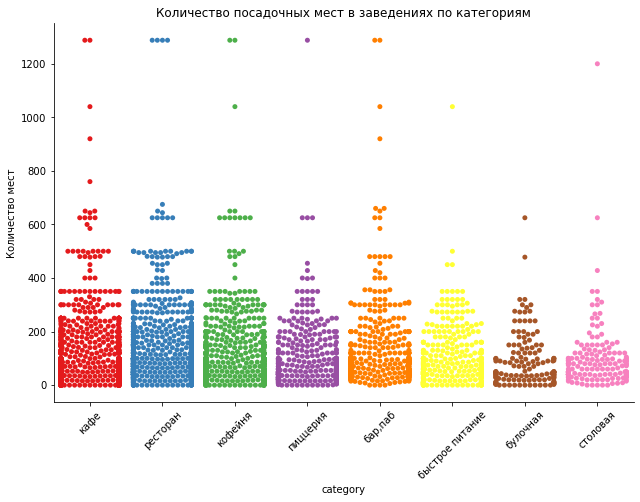

In [30]:
#визуализация количества мест по категориям заведений
sns.catplot(data=data, kind='swarm', x='category', y='seats', palette='Set1', height= 6, aspect= 1.5)
plt.title('Количество посадочных мест в заведениях по категориям')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show()

Из графика видно, что в данных о количестве мест содержится большое количество выбросов. Это может быть связано, с ошибками при заполнении данных, либо заведения действительно имееют такое количество посадочных мест и работают как банкетые залы.

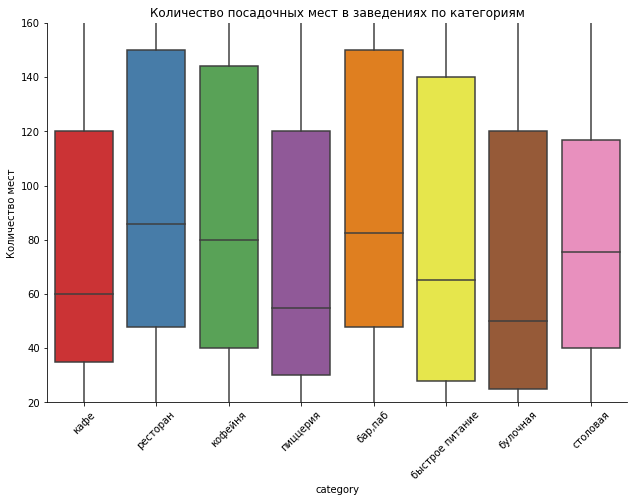

In [31]:
#визуализация количества мест по категориям заведений
sns.catplot(data=data, kind='box', x='category', y='seats', palette='Set1', height= 6, aspect= 1.5)
plt.title('Количество посадочных мест в заведениях по категориям')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.ylim(20, 160)
plt.show()

В среднем все типы заведений имеют вместимость от 30 до 150 мест.

Наибольшее среднее количество посадочных мест имеют заведениях типа: ресторан, бар, паб  и кофейня ~ 85 мест;

Наименьшее среднее количество посадочных мест в заведениях типа: булочная, столовая и кафе ~ 55-60 мест


Посмотрим распределение количества посадочных мест по категориям сетевых и несетевых заведений

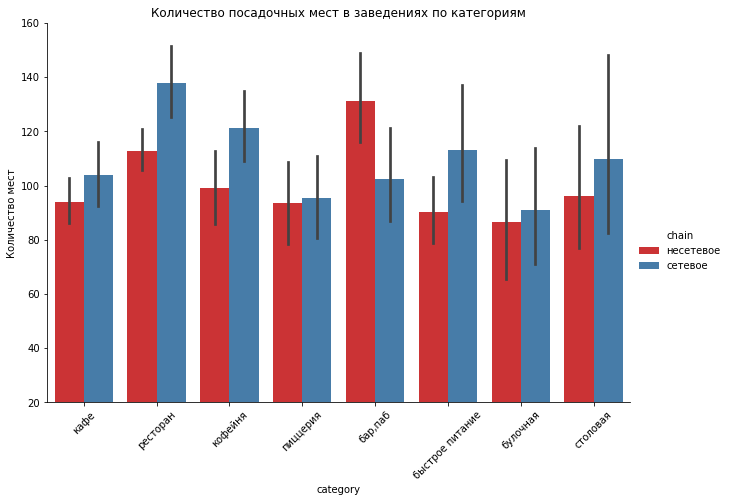

In [32]:
#для корректного отображения легенды в графиках переименуем значения в столбце 'chain'
data['chain'] = data['chain'].replace(1, 'сетевое')
data['chain'] = data['chain'].replace(0, 'несетевое')
#визуализация количества мест по категориям заведений
sns.catplot(data=data, kind='bar', x='category', y='seats', hue='chain', palette='Set1', height= 6, aspect= 1.5)
plt.title('Количество посадочных мест в заведениях по категориям')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.ylim(20, 160)
plt.show()

В целом, количество посадочных мест в сетевых заведениях больше, чем в несетевых.

## Сетевые и несетевые заведения

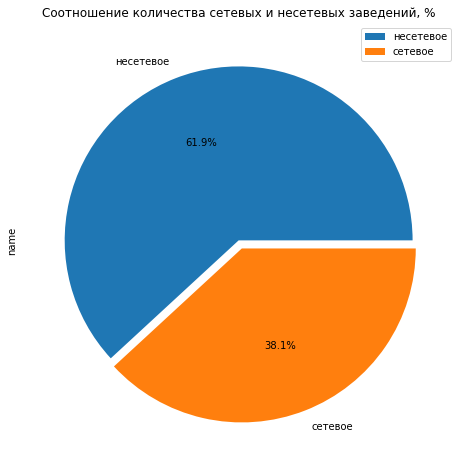

In [33]:
#

chain = data.groupby('chain')['name'].count()
plt.figure(figsize=(10, 8))
colors = sns.color_palette('Set1')
chain = data.groupby('chain')['name'].count()
chain.reset_index()
chain.plot(kind='pie', autopct='%1.1f%%', legend = True, explode =(0,0.05))
plt.title('Соотношение количества сетевых и несетевых заведений, %')
plt.show()


Большая часть заведений Москвы предствлена несетевыми заведениями 61,9 %. Сетевых заведений - 38,1 %

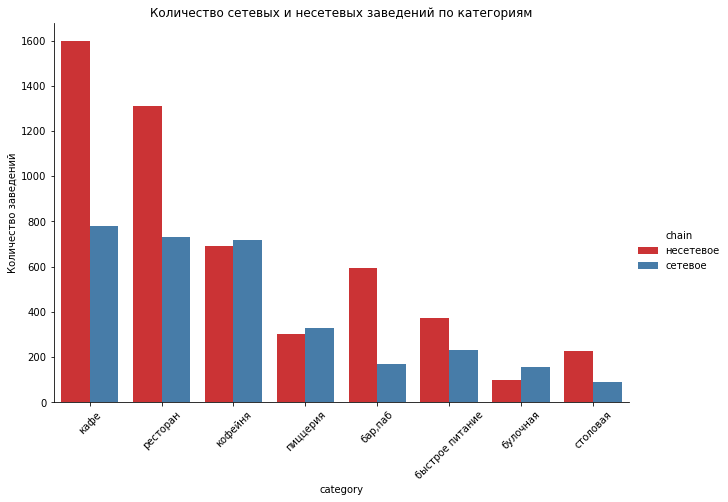

In [34]:
sns.catplot(data=data, kind='count', x='category', hue='chain', palette='Set1', height= 6, aspect= 1.5)
plt.title('Количество сетевых и несетевых заведений по категориям')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.show()

В целом несетевых заведений представлено больше, чем сетевых. Среди сетевых заведений количественное преимущество числу мест общепита имеют только категории кофейня, пиццерия и булочная.

## Топ-15 популярных сетей в Москве

In [35]:
#Выделим 15 наиболее популярных сетей Москвы
top_place = data[data['chain'] == 'сетевое']['name'].value_counts().head(15)


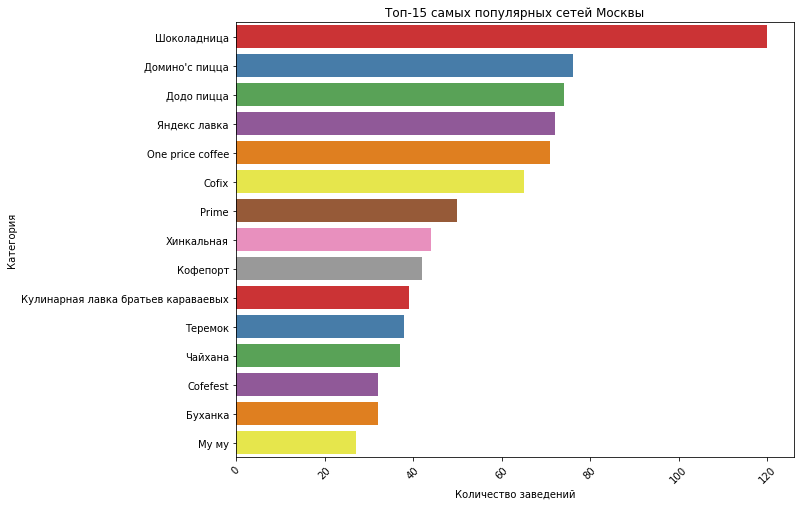

In [36]:
#визуальное представление заведений по категориям
x = top_place
y = top_place.index

plt.figure(figsize=(10, 8))
sns.barplot(x=x,y=y, data=top_place.reset_index(), palette='Set1')

plt.title('Топ-15 самых популярных сетей Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.xticks(rotation=45)
plt.show()

Определим к какому типу заведений относятся данные сети.

Первое место среди сетей занимает кофейня "Шоколадница".

2-е и 3-е места занимают пиццерии Домино'c пицца и Додо пицца соответственно.

В рейтинг попала сеть Яндекс лавка, которая все таки не является типичным представителем общепита и  ориентирована на доставку готовых блюд и продуктов питания.

Большую часть рейтинга занимают сети типа кофейня.

In [37]:
top_place = data[data['chain'] == 'сетевое']['name'].value_counts().head(15)
top_place = data[data['name'].isin(list(top_place.index))]
top_place_and_cat = top_place.groupby(['name', 'category']).agg({'name':'count'})
top_place_and_cat.rename({'name' : 'quantity'}, axis=1, inplace=True)
top_place_and_cat.reset_index(inplace=True)

In [38]:
#строим столбчатую диаграмму 
fig = px.bar(top_place_and_cat, x='name', y='quantity', color='category', color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_xaxes(tickangle=45)
fig.update_layout(title='Распределение заведений и их категорий по топ-15 улицам',
                   xaxis_title='Улица',
                   yaxis_title='Распределение',
                   autosize=False,
                   width=900,
                   height=800,
                   xaxis={'categoryorder':'total descending'})
fig.show()

## Распределение заведений по районам Москвы

Посмотрим какие административные районы Москвы присутствуют в датасете.

In [39]:
district = data['district'].value_counts()
district

Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

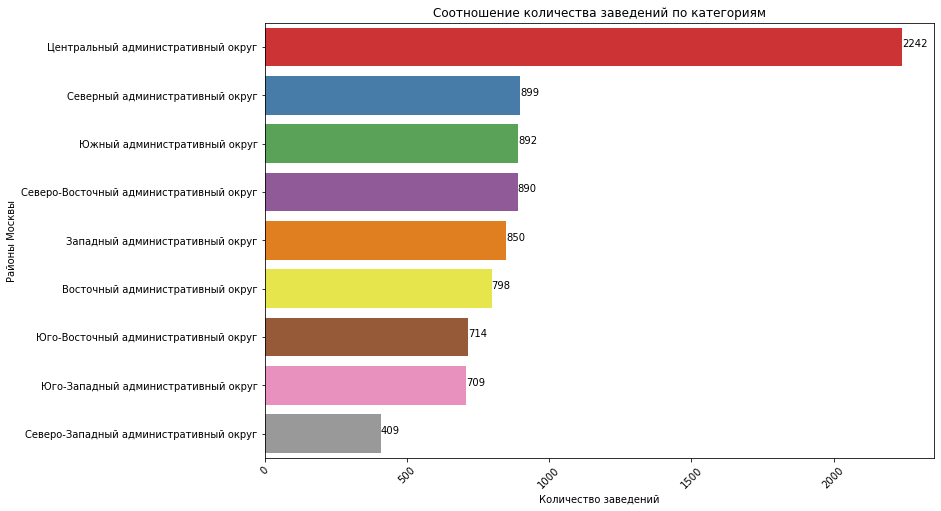

In [40]:

#визуальное представление заведений по категориям
plt.figure(figsize=(12, 8))
p = sns.barplot(x='district',y='index', data=data['district'].value_counts().reset_index(), palette='Set1')

        
show_values(p, "h", space=0)       
plt.title('Соотношение количества заведений по категориям')
plt.xlabel('Количество заведений')
plt.ylabel('Районы Москвы')
plt.xticks(rotation=45)


plt.show()



Безусловный лидер по количеству заведений - Центральный административный округ - 2242 заведения

Меньше всего заведений находится в Северо-Западном административном округе - 409 заведений.

Посмотрим как расределяются заведения по типам по каждому району. 

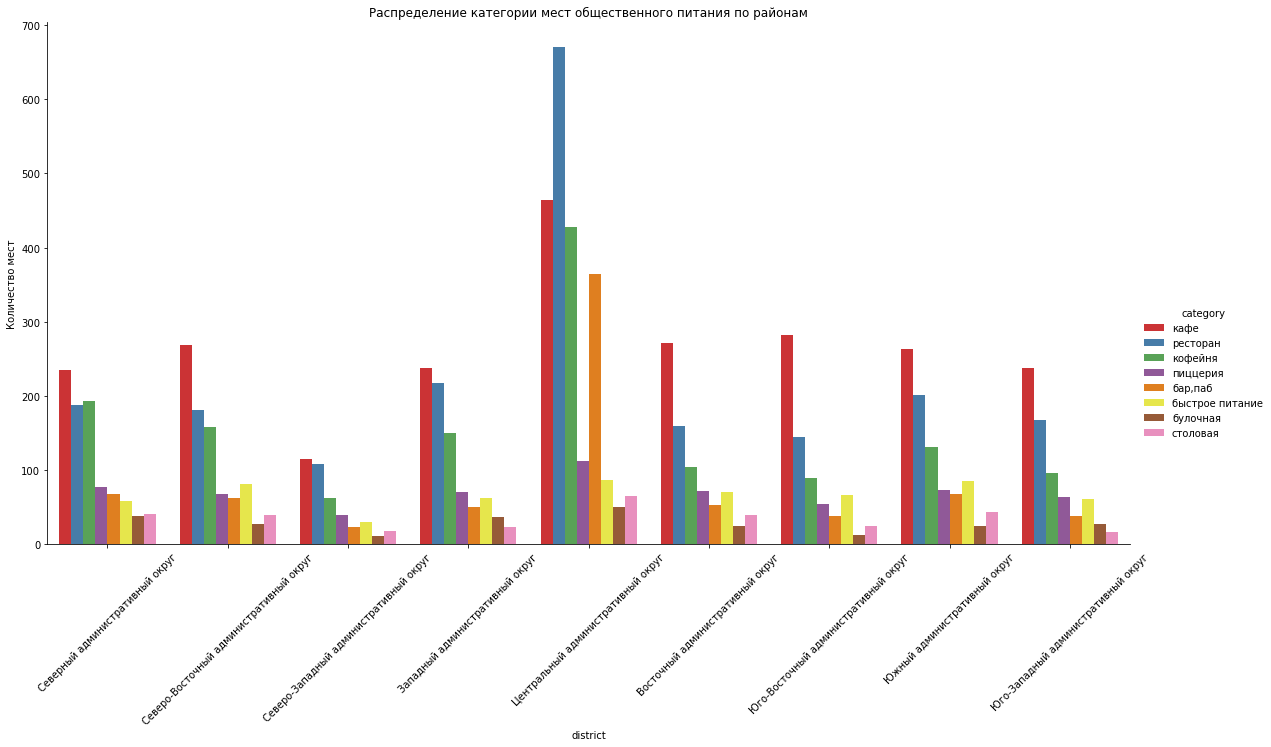

In [41]:

sns.catplot(data=data, kind='count', x='district', hue='category', palette='Set1', height= 8, aspect= 2)
plt.title('Распределение категории мест общественного питания по районам')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show()

В Центральном районе больше открыто заведений типа ресторан. На втором месте идут кафе, затем кофейни и заведения типа бар, паб.

В остальных районах первые по популярности заведения типа кафе, на втором и третьем месте рестораны и кофейни. 

## Средние рейтинги заведений

Определим, как расределяются средние оценки по категориям заведений.

In [42]:
rating_by_category = data.groupby('category')['rating'].mean().sort_values(ascending=False)

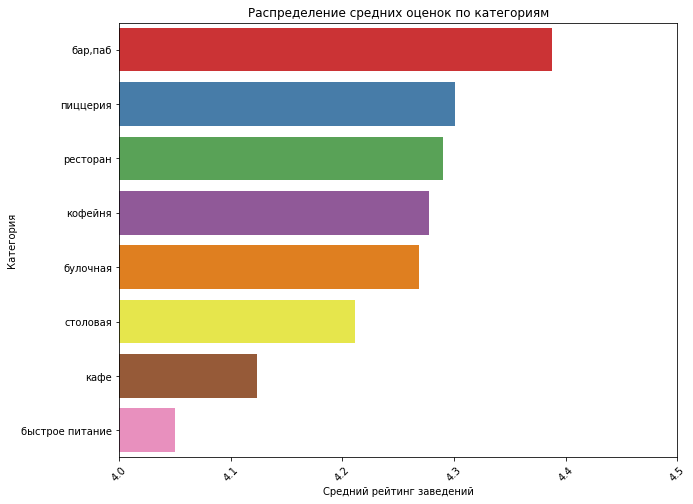

In [43]:
x = rating_by_category
y = rating_by_category.index

plt.figure(figsize=(10, 8))
sns.barplot(x=x,y=y, data=rating_by_category.reset_index(), palette='Set1')
plt.title('Распределение средних оценок по категориям')
plt.xlabel('Средний рейтинг заведений')
plt.ylabel('Категория')
plt.xticks(rotation=45)
plt.xlim(4, 4.5)
plt.show()

Самые высокие рейтинги у заведений категории бар, паб; затем идут пиццерии и рестораны.

Самые низкий рейтинг у категории - общественное питание.

В целом по все заведениям среняя оценка не опускается ниже 4.

Визуализируем распределение средних оценок по района Москвы.

In [44]:
#сохраним в перепенную распределение средних оценок по районам
rating_by_district = data.groupby('district')['rating'].mean()
rating_by_district

district
Восточный административный округ           4.174185
Западный административный округ            4.181647
Северный административный округ            4.239822
Северо-Восточный административный округ    4.147978
Северо-Западный административный округ     4.208802
Центральный административный округ         4.377520
Юго-Восточный административный округ       4.101120
Юго-Западный административный округ        4.172920
Южный административный округ               4.184417
Name: rating, dtype: float64

In [45]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
rating_map = Choropleth(
    geo_data=geo_json,
    data=rating_by_district,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='RdYlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

#код включает показ района при наведении мыши на карту
rating_map.geojson.add_child(folium.features.GeoJsonTooltip(['name',], labels=False))

# выводим карту
m

Самый высокий средний рейтинг имеют заведения Центрального административного округа. Затем идут Северный админтстративный округ и Северо-Западный административный округ.

Юго-Восточный административный округ имеет самые низкие средние оценки.

## Топ-15 улиц по количеству заведений

Выделим наиболее популярные улицы по кол-ву заведений общественного питания

In [46]:

top_street = data['street'].value_counts().head(15)
top_street


проспект Мира             183
Профсоюзная улица         122
проспект Вернадского      108
Ленинский проспект        107
Ленинградский проспект     95
Дмитровское шоссе          88
Каширское шоссе            77
Варшавское шоссе           75
Ленинградское шоссе        69
Люблинская улица           60
улица Вавилова             55
Кутузовский проспект       54
улица Миклухо-Маклая       49
Пятницкая улица            48
Алтуфьевское шоссе         47
Name: street, dtype: int64

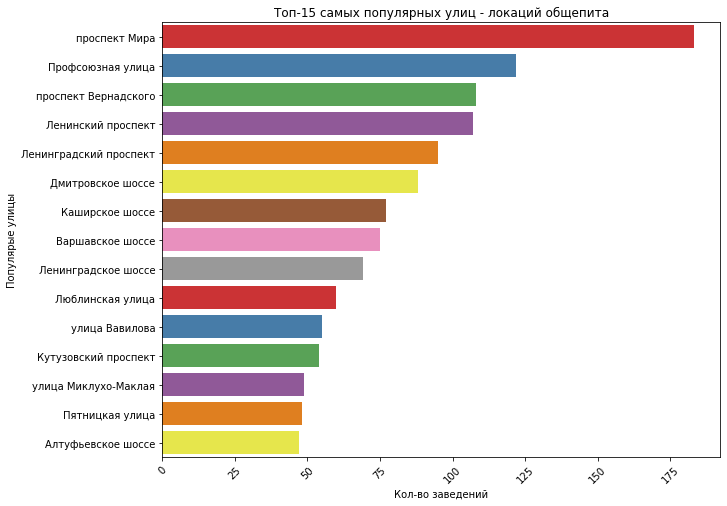

In [47]:
#визуальное представление заведений по категориям
x = top_street
y = top_street.index

plt.figure(figsize=(10, 8))
sns.barplot(x=x,y=y, data=top_street.reset_index(), palette='Set1')
plt.title('Топ-15 самых популярных улиц - локаций общепита')
plt.xlabel('Кол-во заведений')
plt.ylabel('Популярые улицы')
plt.xticks(rotation=45)
plt.show()

Самой популярной улицей стал проспект Мира. 

В целом все данные улицы отличаются своей большой протяженностью. Можно сказать, что на них много мест общепита, потому что они длинные.

Посмотрим как распределены категории заведении на даных улицах.

In [48]:
top_street = data[data['street'].isin(
    data['street'].value_counts()
    .sort_values(ascending=False).head(15).index)]

In [49]:
top_street_and_cat = top_street.groupby(['street', 'category'], as_index=False)['name'].count()
top_street_and_cat.rename({'name' : 'quantity'}, axis=1, inplace=True)

In [50]:

fig = px.bar(top_street_and_cat, x='street', y='quantity', color='category', color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_xaxes(tickangle=45)
fig.update_layout(title='Распределение заведений и их категорий по топ-15 улицам',
                   xaxis_title='Улица',
                   yaxis_title='Распределение',
                   autosize=False,
                   width=900,
                   height=800,
                   xaxis={'categoryorder':'total descending'})
fig.show()

Больше всего на Топ-15 улицах расположено Кафе, ресторанов и кофеен

## Непопулярные улицы

Выделим улицы, которые непопулярны для размещения мест общепита.

In [51]:
one_place = data['street'].value_counts() == 1
one_place = one_place[one_place.values == True]
print('Всего мест общепита, которые находяться на улице одни: ', one_place.shape[0])

Всего мест общепита, которые находяться на улице одни:  427


In [52]:
one_by_street = data[data['street'].isin(one_place.index)]


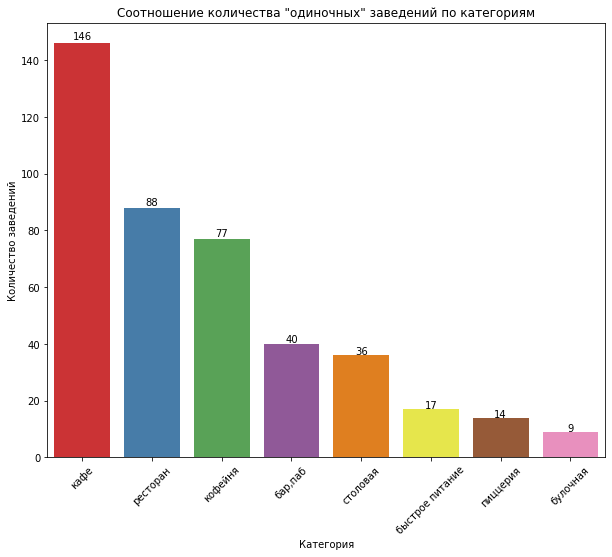

In [53]:
plt.figure(figsize=(10, 8))
p = sns.barplot(x='index',y='category', data=one_by_street['category'].value_counts().reset_index(), palette='Set1')
show_values(p)
plt.title('Соотношение количества "одиночных" заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.show()

Посмотрим, как распределены "одиночные" заведения на карте Москвы.

In [54]:


# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
one_by_street.apply(create_clusters, axis=1)

# выводим карту
m

Заведения, расположенные на локации одни - больше сосредоточены  к центру Москвы.

## Средний счет по категориям заведений

Проанализируем зависимость среднего чека от категории заведения.

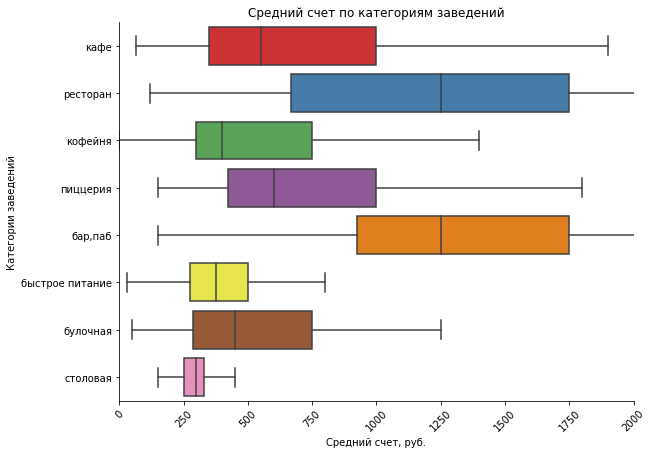

In [55]:
#plt.figure(figsize=(15, 15))
sns.catplot(data=data, kind='box', x='middle_avg_bill', y='category', palette='Set1', height= 6, aspect= 1.5, orient='h', showfliers=False)
plt.title('Средний счет по категориям заведений')
plt.ylabel('Категории заведений')
plt.xlabel('Средний счет, руб.')
plt.xticks(rotation=45)
plt.xlim(0, 2000)
plt.show()

Ожидаемо высокий средний чек у категории ресторан. А так же у категории бар, паб. Самый низкий средний чек у столовых, быстрое питание и булочная.

## Выводы по пункту 4

1. Всего представлено 8 категорий заведений: 'бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая'.

2. Больше всего встречаются заведения категории кафе (28 %) и ресторан (24 %). Менее популярны булочные (3 %) и столовые 4 %). Практически равномерно на рынке общественного питания Москвы распределены заведения типов 'бар,паб', 'пиццерия', 'быстрое питание'.

3. В среднем все типы заведений имеют вместимость от 30 до 150 мест. Наибольшее среднее количество посадочных мест имеют заведениях типа: ресторан, бар, паб и кофейня ~ 85 мест. Наименьшее среднее количество посадочных мест в заведениях типа: булочная, столовая и кафе ~ 55-60 мест

4. Большая часть заведений Москвы предствлена несетевыми заведениями 61,9 %. Сетевых заведений - 38,1 %. Самая крупная сеть Москвы - кофейня "Шоколадница". 2-е и 3-е места занимают пиццерии Домино'c пицца и Додо пицца соответственно. Большая часть сетевых заведений имеют категорию кофейня.

5. Безусловный лидер по количеству заведений - Центральный административный округ - 2242 заведения. Меньше всего заведений находится в Северо-Западном административном округе - 409 заведений.

6. Самые высокие рейтинги у заведений категории бар, паб; затем идут пиццерии и рестораны. Самые низкий рейтинг у категории - общественное питание. В целом по все заведениям среняя оценка не опускается ниже 4.

7. Самый высокий средний чек наблюдается у категории ресторан. А так же у категории бар, паб. Самый низкий средний чек у столовых, быстрое питание и булочная.

# Анализ заведений категории кофейня

## Распределение кофеен по районам

Определим сколько всего кофеен в датасете и в каких районах они больше встречаются. 

In [56]:
coffee_data = data.query('category == "кофейня"')
print('Всего кофеен в Москве: ', coffee_data.shape[0])

Всего кофеен в Москве:  1413


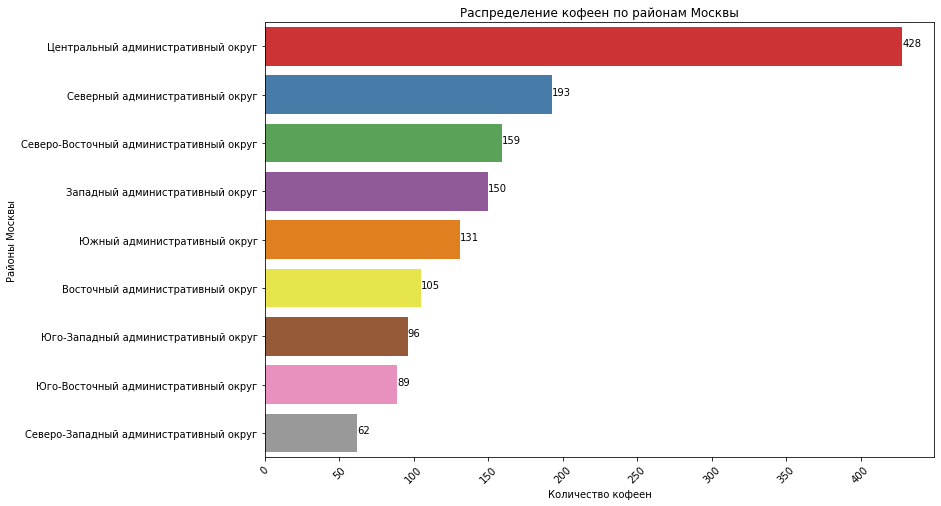

In [57]:
#визуальное представление заведений по категориям
plt.figure(figsize=(12, 8))
p = sns.barplot(x='district',y='index', data=coffee_data['district'].value_counts().reset_index(), palette='Set1')
show_values(p, "h", space=0)
plt.title('Распределение кофеен по районам Москвы')
plt.xlabel('Количество кофеен')
plt.ylabel('Районы Москвы')
plt.xticks(rotation=45)
plt.show()

Как и с другими типами заведений, кофейни больше всего распространены в Центральном административном округе. Кофеен в нем представлено в среднем 2-3 раза больше, чем в остальных районах.

Посмотрим, как распределены кофейни на карте Москвы

In [58]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
# создаём карту Москвы
сoffee_map = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(сoffee_map)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
coffee_data.apply(create_clusters, axis=1)

# выводим карту
сoffee_map

На карте прослеживается, что меньше всего кофеен открыто на Востоке и Юге города.

## Круглосуточные и некруглосуточные кофейни

Посмотрим есть ли круглосуточные кофейни в Москве.

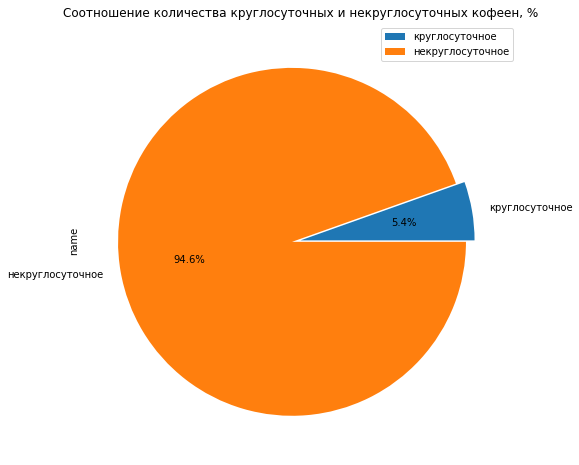

In [59]:
coffee_data['is_24/7'] = coffee_data['is_24/7'].replace(False, 'некруглосуточное')
coffee_data['is_24/7'] = coffee_data['is_24/7'].replace(True, 'круглосуточное')

plt.figure(figsize=(10, 8))
colors = sns.color_palette('Set1')
coffee_24 = coffee_data.groupby('is_24/7')['name'].count()
coffee_24.plot(kind='pie', autopct='%1.1f%%', legend = True, explode =(0,0.05))
plt.title('Соотношение количества круглосуточных и некруглосуточных кофеен, %')
plt.show()


Круглосуточные кофейни открывают не очень часто. Возможно причина в том, что они не популярны и ночью кофе много не пьют, а издержки на содержание высокие.

## Cредние оценки кофеен

Визуализируем распределение средних оценок кофеен на карте Москвы.

In [60]:
rating_by_coffee = coffee_data.groupby('district')['rating'].mean()

In [61]:
# создаём карту Москвы
с = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
coffee_map = Choropleth(
    geo_data=geo_json,
    data=rating_by_coffee,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='RdYlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(с)

#код включает показ района при наведении мыши на карту
coffee_map.geojson.add_child(folium.features.GeoJsonTooltip(['name',], labels=False))

# выводим карту
с

Районы с самыми высокими средними рейтингами - Центральный административный округ и Северо-Западный  административный округ.

Хуже всего средний рейтинг в - Северо-Восточном административном округе и Западном административном округе.

## Стоимость "средней чашки капучино"

In [62]:
coffee_data['middle_coffee_cup'].describe()

count     521.000000
mean      175.055662
std        89.753009
min        60.000000
25%       124.000000
50%       170.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

Стоимость чашки капучино в кофейнях Москвы состовляет от 60 до 1568 рублей. Средняя стомость чашки по Москве 175 рублей, медиана 150 рублей.

Определим, как распределена стоимость чашки капучино в сетевых и несетевых заведениях

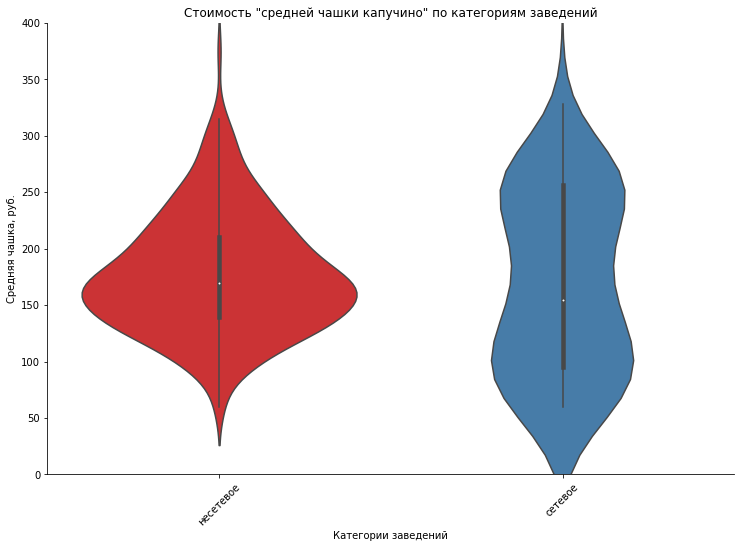

In [63]:
sns.catplot(data=coffee_data, kind='violin', x='chain', y='middle_coffee_cup', palette='Set1', height= 7, aspect= 1.5)

plt.title('Стоимость "средней чашки капучино" по категориям заведений')
plt.ylabel('Средняя чашка, руб.')
plt.xlabel('Категории заведений')
plt.xticks(rotation=45)
plt.ylim(0, 400)
plt.show()

В сетевых заведениях медиана стоимости чашки капучино ниже ~ 150 руб., медианы несетевых кофеен ~ 170 руб. 

В несетевых заведениях большинство "средних чашек" в кофейнях имеет стоимость 140-175 рублей.

В сетевых кофейнях визуализируется два пика в районе 100 рублей и 250 рублей за чашку. Таким образом можно предпложить, что сети кофеен делятся на сети с доступным и бюджетным кофе, и кофейни с более дорогим и премиальным кофе.

Посмотрим, есть ли отличия в стоимости чашки капучино по округам Москвы

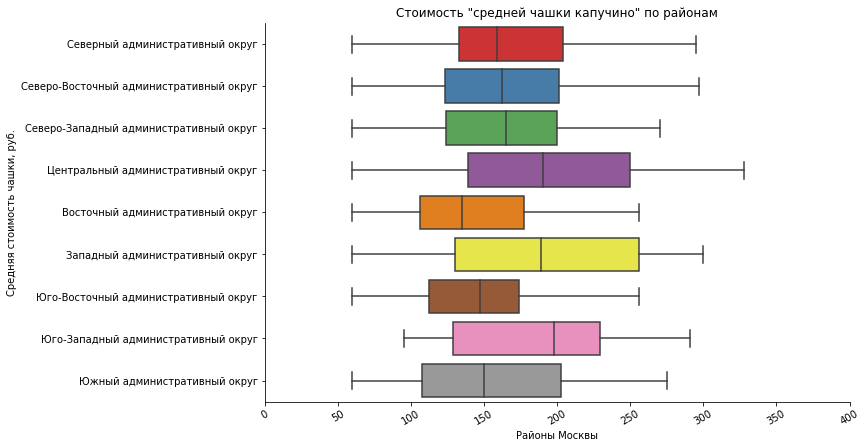

In [64]:
#plt.figure(figsize=(15, 15))
sns.catplot(data=coffee_data, kind='box', x='middle_coffee_cup', y='district', palette='Set1', height= 6, aspect= 2, orient='h', showfliers=False)

plt.title('Стоимость "средней чашки капучино" по районам')
plt.ylabel('Средняя стоимость чашки, руб.')
plt.xlabel('Районы Москвы')
plt.xticks(rotation=30)
plt.xlim(0, 400)
plt.show()

Визуализируем как распределены медианные значения "средней чашки капучино" по Москве

In [65]:
# группируем данные по медиане чашки
middle_coffee_cup = coffee_data.groupby('district')['middle_coffee_cup'].median()
# создаём карту Москвы
cup = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
coffee_cup_map = Choropleth(
    geo_data=geo_json,
    data=middle_coffee_cup,
    columns=['district', 'middle_coffee_cup'],
    key_on='feature.name',
    fill_color='RdYlGn',
    fill_opacity=0.8,
    legend_name='Стоимость "средней чашки капучино"',
).add_to(cup)

#код включает показ района при наведении мыши на карту
coffee_cup_map.geojson.add_child(folium.features.GeoJsonTooltip(['name',], labels=False))

# выводим карту
cup

В среднем самое дорогое капучино в центре, на западе и юго-западе Москвы

Самые низкие цены на капучино на востоке Москвы.

## Топ-10 самых популярных сетей кофеен Москвы

In [66]:
coffee_chain = coffee_data[coffee_data['chain'] == 'сетевое']
print('Всего сетевых кофеен в Москве: ', coffee_chain.shape[0])

Всего сетевых кофеен в Москве:  720


Получается, что сетевые и несетевые кофейни распределены примерно одинаково. Половина кофеен Москвы относятся к сетевым.

In [67]:
top_coffee = coffee_data[coffee_data['chain'] == 'сетевое']['name'].value_counts().head(10)
top_coffee

Шоколадница         119
One price coffee     71
Cofix                65
Кофепорт             42
Cofefest             31
Кофемания            22
Cinnabon             20
Правда кофе          13
Krispy kreme          9
Coffeekaldi's         8
Name: name, dtype: int64

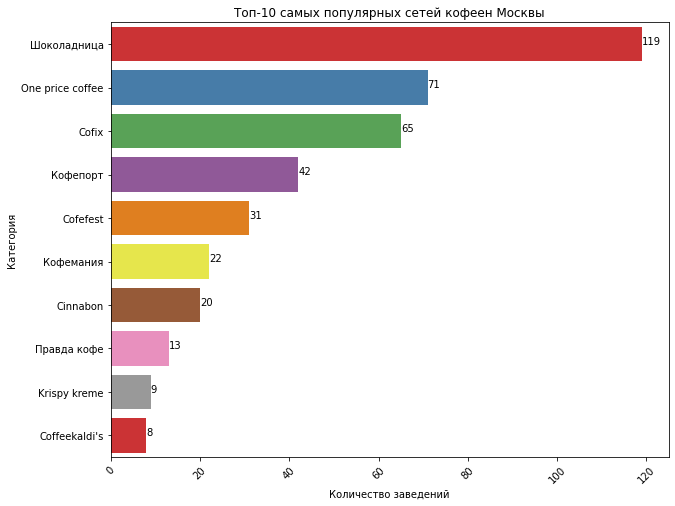

In [68]:
#визуальное представление заведений по категориям
x = top_coffee
y = top_coffee.index

plt.figure(figsize=(10, 8))
p = sns.barplot(x=x,y=y, data=top_coffee.reset_index(), palette='Set1')
show_values(p, "h", space=0)
plt.title('Топ-10 самых популярных сетей кофеен Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.xticks(rotation=45)
plt.show()

## Выводы по пункту 5

1. Всего на данный момент открыто кофеен в Москве - 1413, из них сетевых кофеен - половина или 720 заведений.

2. Кофейни больше всего распространены в Центральном административном округе. Кофеен в нем представлено в среднем 2-3 раза больше, чем в остальных районах.

3. 5,4 % всех кофеен - являются круглосуточными.

4. Районы с самыми высокими средними рейтингами - Центральный административный округ и Северо-Западный  административный округ. Хуже всего средний рейтинг в - Северо-Восточном административном округе и Западном административном округе.

5. Стоимость чашки капучино в кофейнях Москвы состовляет от 60 до 1568 рублей. Средняя стомость чашки по Москве 175 рублей, медиана 150 рублей. Самые высокие средние цены на капучино в центре, на западе и юго-западе Москвы. Самые низкие цены на капучино на востоке Москвы.

6. В сетевых заведениях медиана стоимости чашки капучино ниже ~ 150 руб., медианы несетевых кофеен ~ 170 руб. 

7. В несетевых заведениях большинство "средних чашек" в кофейнях имеет стоимость 140-175 рублей. Сетевые кофейни по среднему чеку условно делятся на бюджетные со стоимостью "чашки" в районе 100 рублей, и более высокого сегмента  - 250 рублей за чашку.

8. Топ-10 кофеен по числу открытых заведений:

   Шоколадница         119
   One price coffee     71
   Cofix                65
   Кофепорт             42
   Cofefest             31
   Кофемания            22
   Cinnabon             20
   Правда кофе          13
   Krispy kreme          9
   Coffeekaldi's         8

# Общий вывод

Для анализа представлен датасет из 8406 строк и 14 столбцов. Всего содержится информация о 8405 заведений общественного питания. При обработке датасета было замечено большое количество пропусков в столбцах с информацией о размере среднего чека и "средней чашки капучино", а также, в столбце с количеством посадочных мест, пропуски решено оставить и анализировать только доступную часть информации. Явных дубликатов не обнаружено. Обнаружены неявные дубликаты по названию мест общественного питания и  сочетанию названия и адреса. Данные обработаны.

Рынок общественного питания в Москве развит неравномерно. Большая часть заведений сосредоточена в Центральном административном округе. Среди заведений преобладают места с категорией Ресторан, кафе и кофейня. 
В среднем все типы заведений имеют вместимость от 30 до 150 мест. Наибольшее среднее количество посадочных мест имеют заведениях типа: ресторан, бар, паб и кофейня ~ 85 мест. Большая часть заведений Москвы предствлена несетевыми заведениями 61,9 %. Сетевых заведений - 38,1 %. Самая крупная сеть Москвы - кофейня "Шоколадница". 2-е и 3-е места занимают пиццерии Домино'c пицца и Додо пицца соответственно. Большая часть сетевых заведений имеют категорию кофейня.

На данный момент открыто кофеен в Москве - 1413, из них сетевых кофеен - 720 заведений. Кофейни также больше всего распространены в Центральном административном округе. Кофеен в нем представлено в среднем 2-3 раза больше, чем в остальных районах. 

В качестве локации для открытия кофейни в Москве стоит рассмотреть Юго-Западный административный округ - в нем самые высокие средние цены на чашку капучино и низкая насыщенность открытых заведений (7-е место из 9 округов по количеству открытых кофеен). Юго-Западный административный округ - имеет средние оценки рейтинга заведений-кофеен.  Хорошее обслуживание и вкусный кофе может послужить хороший конкурентным преимуществом нового открытого заведения.

При открытии рекомендуем ориентироваться на цену чашки капучино в размере - 180-190 рублей. Это ниже, чем средние  цены на кофе в данном округе. Сниженная цена сможет послужить конкурентым преимуществом и привлечь потенциальную аудиторию.

Презентация: <ссылка на облачное хранилище с презентацией> https://drive.google.com/file/d/1W0rZFjEPseNL_jhqDBfrn2lXudvU3_K7/view?usp=sharing
